<a href="https://colab.research.google.com/github/Gowri4622/Binary-Classification/blob/main/FirstMLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd



In [42]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)



In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
worksheet = gc.open('MyDataset').sheet1

rows = worksheet.get_all_values()

df = pd.DataFrame(rows[1:], columns=rows[0])

df.head(n=9)

,X,Y
0,10,35
1,20,65
2,30,95
3,40,125
4,50,155
5,60,185
6,70,215
7,80,245
8,90,275


In [45]:
df.dtypes

X    object
Y    object
dtype: object

In [46]:
df = df.astype({'X':'float'})
df = df.astype({'Y':'float'})

In [47]:
df.dtypes

X    float64
Y    float64
dtype: object

In [48]:
x=df[['X']].values

In [49]:
x

array([[10.],
       [20.],
       [30.],
       [40.],
       [50.],
       [60.],
       [70.],
       [80.],
       [90.]])

In [50]:
y=df[['Y']].values

In [51]:
y


array([[ 35.],
       [ 65.],
       [ 95.],
       [125.],
       [155.],
       [185.],
       [215.],
       [245.],
       [275.]])

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=50)

In [53]:
X_train

array([[30.],
       [20.],
       [60.],
       [40.],
       [90.],
       [10.]])

In [54]:
#to scale the input from 0 to 1
scaler=MinMaxScaler() 

In [55]:
scaler.fit(X_train)

MinMaxScaler()

In [56]:
X_train_scaled=scaler.transform(X_train)

In [57]:
X_train_scaled

array([[0.25 ],
       [0.125],
       [0.625],
       [0.375],
       [1.   ],
       [0.   ]])

In [58]:
ai_brain=Sequential([
    Dense(2,activation='relu'),
    Dense(1,activation='relu')
])

In [59]:
ai_brain.compile(optimizer='rmsprop',loss='mse')

In [60]:
ai_brain.fit(x=X_train_scaled,y=Y_train,epochs=20000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 11ms/step - loss: 2.5947e-04
Epoch 17502/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.5968e-04
Epoch 17503/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.6035e-04
Epoch 17504/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.6062e-04
Epoch 17505/20000
1/1 [==============================] - 0s 15ms/step - loss: 2.6111e-04
Epoch 17506/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.6159e-04
Epoch 17507/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.6131e-04
Epoch 17508/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.6062e-04
Epoch 17509/20000
1/1 [==============================] - 0s 14ms/step - loss: 2.6020e-04
Epoch 17510/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.5969e-04
Epoch 17511/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.5

In [61]:
loss_df=pd.DataFrame(ai_brain.history.history)

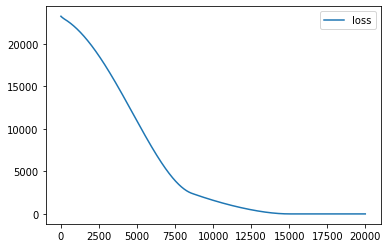

In [62]:
loss_df.plot()

In [63]:
X_test

array([[50.],
       [70.],
       [80.]])

In [64]:
X_test_scaled=scaler.transform(X_test)

In [65]:
X_test_scaled

array([[0.5  ],
       [0.75 ],
       [0.875]])

In [66]:
ai_brain.evaluate(X_test_scaled,Y_test)

1/1 [==============================] - 0s 116ms/step - loss: 4.1075e-04


0.0004107461718376726

In [67]:
input=[[100]]

In [68]:
input_scaled=scaler.transform(input)

In [69]:
input_scaled.shape

(1, 1)

In [70]:
ai_brain.predict(input_scaled)

array([[304.94128]], dtype=float32)